Inspecting data from a manual inhibition paradigm

Clara Kuper, January 2021

In this task, one obeserver made radip hand movements from one point to another. In half of the trials, the upper and lower third of the screen turned white for 50ms. This "flash" occured 50 ms before the mean reaction time. This delay is known to elicit saccadic inhibition (a dip in the distribution of saccadic reaction times). We want to see if the same is true fo manual responses.

In this notebook, I will:

1. Load the data from the experiment
2. Look at the reaction time distributions from flash and no-flash conditions
3. Clean the reaction time data
4. Align the reaction times to the onset of the flash and check again for the distribution
5. Compare the flash and no flash condition statistically

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

data_random = pd.read_csv('../1_Data/ck01_MI_dat.csv')
data_2t_5deg = pd.read_csv('../1_Data/ck02_MI_dat.csv')
data_2t_10deg = pd.read_csv('../1_Data/ck03_MI_dat.csv')
data_2t_10deg

,id,success,rea_time,clean_rea,mov_time,initPixx,t_start,t1_draw,t2_draw,t_fixed,t_flash,t_movStart,t_movEnd,t_feedback,t_end,mean_rt,touchX,touchY,version
0,1,1,0.216861,0.216861,0.150080,3907.853288,3912.872179,3912.877361,3914.335708,3913.603225,3914.443982,3914.552569,3914.702649,3915.344097,3915.344097,0.100000,652.595001,553.540128,2tar
1,2,1,0.225113,0.225113,0.116860,3915.344097,3917.181663,3917.185709,3918.143990,3917.552525,NaN,3918.369103,3918.485963,3919.144099,3919.144099,0.116861,1269.152611,528.193008,2tar
2,3,1,0.241754,0.241754,0.100089,3919.144099,3920.873231,3920.877356,3921.810724,3921.219888,NaN,3922.052478,3922.152567,3922.819164,3922.819164,0.120987,1321.580979,519.419005,2tar
3,4,1,0.200115,0.200115,0.108668,3922.819164,3924.542649,3924.544132,3925.544065,3924.835981,3925.677440,3925.744180,3925.852847,3926.544165,3926.544165,0.127909,1300.609632,525.918267,2tar
4,5,1,0.216792,0.216792,0.133425,3926.544165,3928.273308,3928.277424,3929.244094,3928.544326,3929.369144,3929.460885,3929.594311,3930.244261,3930.244261,0.120961,638.963625,522.343673,2tar
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,502,1,0.216517,0.216517,0.116744,5850.806296,5852.528015,5852.531256,5853.456471,5852.906556,5853.564563,5853.672988,5853.789732,5854.464683,5854.464683,0.106458,1322.105263,527.868045,2tar
502,503,1,0.183434,0.183434,0.133440,5854.464683,5856.187103,5856.189557,5857.056244,5856.481423,NaN,5857.239678,5857.373118,5858.056364,5858.056364,0.106567,1260.764072,543.791236,2tar
503,504,1,0.183577,0.183577,0.174941,5858.056364,5859.778373,5859.781353,5860.772945,5860.064809,NaN,5860.956522,5861.131462,5861.773057,5861.773057,0.106319,623.235115,536.642048,2tar
504,505,1,0.216808,0.216808,0.166735,5861.773057,5863.495054,5863.497962,5864.564633,5863.864890,NaN,5864.781442,5864.948177,5865.564787,5865.564787,0.106077,619.040845,540.541605,2tar


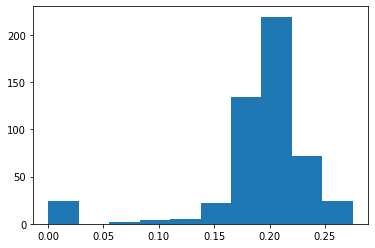

In [34]:
# normalize all times to the "go" signal of the task (t2_draw)
data = data_2t_10deg
data['initPixx'] = data['initPixx'] - data['t2_draw']
data['t_start'] = data['t_start'] - data['t2_draw']
data['t1_draw'] = data['t1_draw'] - data['t2_draw']
data['t2_draw'] = data['t2_draw'] - data['t2_draw']
data['t_fixed'] = data['t_fixed'] - data['t2_draw']
data['t_flash'] = data['t_flash'] - data['t2_draw']
data['t_movStart'] = data['t_movStart'] - data['t2_draw']
data['t_movEnd'] = data['t_movEnd'] - data['t2_draw']
data['t_feedback'] = data['t_feedback'] - data['t2_draw']
data['t_end'] = data['t_end'] - data['t2_draw']

plt.hist(data.rea_time);

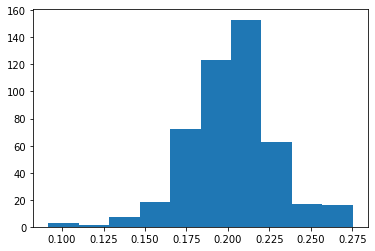

In [35]:
# clean the dataset: remove all time trials where the reaction time is larger or smaller than 2 std
# also, remove all unsuccessful trials
# get standart deviation
rea_std = np.std(data.rea_time)

# get std as variation from mean
rea_cut_high = np.mean(data.rea_time) + 2* rea_std
rea_cut_low = np.mean(data.rea_time) - 2* rea_std

# delete the rows with too low/high reaction times
rm_idx = np.where((data.rea_time >= rea_cut_high) | (data.rea_time <= rea_cut_low))
df = data.drop(rm_idx[0]).reset_index(drop = True)
# delete rows with unsuccessful trials
df = df.drop(np.where(df.success ==0)[0])
# plot all trials together
plt.hist(df.rea_time);

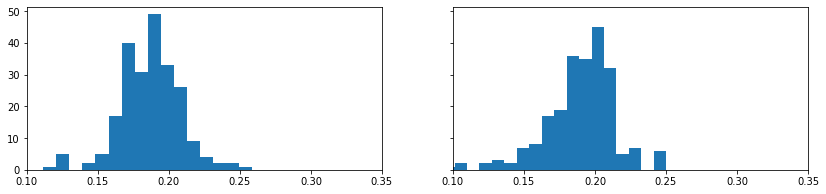

In [6]:
# plot reaction times of flash - and no-flash trials seperately
fig1, axs1 = plt.subplots(1,2, figsize  = (14,3), sharey = True)
axs1[0].hist(df[np.isnan(df.t_flash)]['rea_time'], bins = 20)
axs1[0].set_xlim(0.1,0.35)
axs1[1].hist(df[np.isnan(df.t_flash)==False]['rea_time'], bins = 20)
axs1[1].set_xlim(0.1,0.35);

C:\Users\ClaraQ\anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ClaraQ\anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


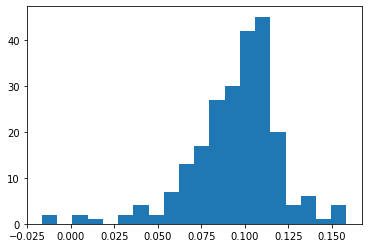

In [7]:
# This doesn't look like a dip, but maybe the problem is that the flash was not always presented 
# at the same time relative to the movement onset. Lets check that

df['flash_movement'] = df.t_movStart - df.t_flash
plt.hist(df.flash_movement, bins =20);

In [32]:
# So we can see that there is a distribution of reaction times, centeres ar 30-50 ms (which is what we were looking for)
# There are few negative times, which is good, bc it means that rarely was the flash shown after the hand already moved.
# We don't see a dip in the responses as we would expect at around 50 - 70 ms
# we can still compare if the reaction times differ between flash and no flash conditions
flash_trials = df[np.isnan(df.t_flash)==False]['rea_time']
no_flash_trials = df[np.isnan(df.t_flash)]['rea_time']

print(len(flash_trials))
print(len(no_flash_trials))

flash_trials = np.random.choice(flash_trials, len(no_flash_trials))

stats.ks_2samp(flash_trials,no_flash_trials)

149
159


Ks_2sampResult(statistic=0.05660377358490566, pvalue=0.9617909391587456)

In [23]:
flash_trials.values

AttributeError: 'numpy.ndarray' object has no attribute 'values'

Conclusion: we find no evidence for manual freezing in the response times. Let's have a look at the duration of the movement instead of the latency

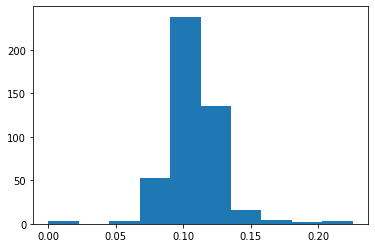

In [9]:
plt.hist(df.mov_time);

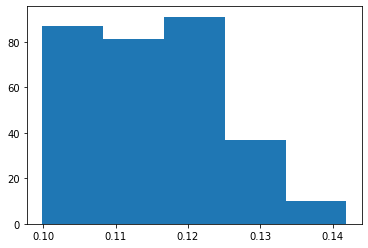

In [13]:
mov_std = np.std(df.mov_time)

# get std as variation from mean
mov_cut_high = np.mean(data.mov_time) + 2* mov_std
mov_cut_low = np.mean(data.mov_time) - 2* mov_std

# delete the rows with too low/high reaction times
rm_idx = np.where((data.mov_time >= mov_cut_high) | (data.mov_time <= mov_cut_low))
df = data.drop(rm_idx[0]).reset_index(drop = True)
# plot all trials together
plt.hist(df.mov_time, bins = 5);

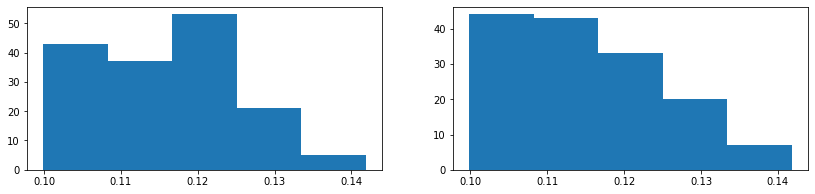

In [15]:
fig2, axs2 = plt.subplots(1,2, figsize = (14,3))
axs2[0].hist(df[np.isnan(df.t_flash)]['mov_time'], bins = 5)
axs2[1].hist(df[np.isnan(df.t_flash)==False]['mov_time'], bins = 5);

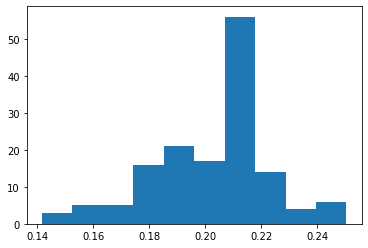

In [16]:
# correct the movement durations and show them realtive to flash onset 

mov_flash = df.t_movEnd - df.t_flash
mov_flash = mov_flash[mov_flash<0.5]
plt.hist(mov_flash);